In [31]:
#df[df['NA_Sales'].str.contains()]
#df['NA_Sales'] = pd.to_numeric(df['NA_Sales'])  'NA_Sales'의 컬럼의 데이터를 숫자형으로 변경
#11번행의 'NA_Sales', 'EU_Sales', 'JP_Sales'데이터의 단위 문자열 제거 및 단위 변환	
#df[df['NA_Sales']=='480K']   #480K의 값을 가진 컬럼 'NA_Sales'의 행 뽑아오기. #11번 행이라는것을 확인,
#df[df['NA_Sales'].str.contains('M')]  #'NA_Sales'에서 M라는 값을 가진 행 모두 출력


#df.at[448,'NA_Sales'] = '580K'
#df.at[459,'NA_Sales'] = '250K'

#df[df['NA_Sales'].str.contains('M',na =False)]   # 데이터 프레임의 컬럼명 'NA_Sales' 에서 'M'이라는 문자값을 가진 컬럼을 모두 출력해라.
#여기서 오류가 발생했었음.
#Cannot mask with non-boolean array containing NA / NaN values
#결론: 엑셀에서 읽어들인 값들 중에 True 혹은 False로 리턴할 수 없는 데이터가 존재함을 의미한다.
#만약 엑셀에 빈 로우가 포함되어 있다면 가능성은 더욱더 커진다.
#오류해결을 위해서는 Na 또는 NaN값이 존재하는 경우에 대한 예외 처리가 필요하다, 문자열을 찾을 때, 칼럼에 NaN값이 존재하면 NaN값을 반환한다.
#그렇기에 오류가 발생한다,
#이럴때를 대비하여 str.contains()함수의 인자값인 na 변수를 사용하여 NaN을 만나게 되었을 경우, 기본 값 설정이 필요하다.
#NaN이 존재할 때 False로 치환하는 코드는 .str.contains('M',na =False)에서 na =False를 이용한다.
#df2.index.tolist()    #index만 쓰면 값들이 줄여져서 나오는데, .tolist()를 쓰면 값을 다출력함.

# PROJECT :다음 분기에 어떤 게임을 설계해야 할까?

---



##1.데이터 불러오기.

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import gc
import matplotlib as mpl

%matplotlib inline

In [34]:

df=pd.read_csv('/content/drive/MyDrive/vgames2.csv',index_col = 0)                      # 컬럼명에서 'Unnamed: 0' 제거 index_col = 0
df
df.shape                                                                                # 데이터 모양 확인 (16598,9)
df.isnull().values.any()                                                                #NaN값이 있으면 True를 반환 '.isnull().values.any() '


df['NA_Sales'].isnull().sum()

0



## 2. 데이터프레임중 'Genre'부분과 'Year'의 결측값 구별하여 채워넣기.
* 장르 부분에 기타 장르가 있음에도 빈값이 있음, 게임을 살펴본 후 연관된  'Genre'에 넣어주기.

* 두 자리수 연도 네 자리 수로 바꿔주기.


In [35]:
df.at[51, 'Genre'] = 'Platform'
df.at[409, 'Genre'] = 'Sports'
df.at[1329, 'Genre'] = 'Sports'
df.at[1583, 'Genre'] = 'Music'
df.at[1972, 'Genre'] = 'Adventure'
df.at[2044, 'Genre'] = 'Racing'
df.at[2498, 'Genre'] = 'Adventure'
df.at[3354, 'Genre'] = 'Adventure'
df.at[3364, 'Genre'] = 'Racing'
df.at[3471, 'Genre'] = 'Role-Playing'
df.at[3516, 'Genre'] = 'Simulation'
df.at[3933, 'Genre'] = 'Sports'
df.at[4149, 'Genre'] = 'Action'
df.at[4350, 'Genre'] = 'Strategy'
df.at[4546, 'Genre'] = 'Fighting'
df.at[4599, 'Genre'] = 'Platform'
df.at[4936, 'Genre'] = 'Role-Playing'
df.at[5669, 'Genre'] = 'Simulation'
df.at[5714, 'Genre'] = 'Adventure'
df.at[5946, 'Genre'] = 'Role-Playing'
df.at[6799, 'Genre'] = 'Strategy'
df.at[7144, 'Genre'] = 'Action'
df.at[7337, 'Genre'] = 'Sports'
df.at[7527, 'Genre'] = 'Action'
df.at[7798, 'Genre'] = 'Platform'
df.at[9489, 'Genre'] = 'Action'
df.at[10433, 'Genre'] = 'Action'
df.at[10502, 'Genre'] = 'Strategy'
df.at[10875, 'Genre'] = 'Music'
df.at[11051, 'Genre'] = 'Simulation'
df.at[11064, 'Genre'] = 'Action'
df.at[11269, 'Genre'] = 'Role-Playing'
df.at[11497, 'Genre'] = 'Racing'
df.at[11669, 'Genre'] = 'Shooter'
df.at[11700, 'Genre'] = 'Misc'
df.at[12315, 'Genre'] = 'Sports'
df.at[12332, 'Genre'] = 'Action'
df.at[12341, 'Genre'] = 'Strategy'
df.at[12871, 'Genre'] = 'Strategy'
df.at[12983, 'Genre'] = 'Action'
df.at[13349, 'Genre'] = 'Misc'
df.at[14931, 'Genre'] = 'Adventure'
df.at[15078, 'Genre'] = 'Racing'
df.at[15212, 'Genre'] = 'Shooter'
df.at[15427, 'Genre'] = 'Strategy'
df.at[15527, 'Genre'] = 'Action'
df.at[16092, 'Genre'] = 'Strategy'
df.at[16432, 'Genre'] = 'Racing'
df.at[16556, 'Genre'] = 'Shooter'
df.at[16588, 'Genre'] = 'Racing'
#df[df['Genre'].isnull()]     
df['Genre'].isnull().values.any()   #장르에 결측값이 있는 행이 출력되지 않음, 결측값을 채워 넣었다!!




False

In [36]:
df.iat[31, 2] = 2007  #row의 적힌 번호가 아닌, 데이터의 순서에 따른 번호로 작성해야 값을 채워넣을 수 있다. #year
df.loc[32]  #적용된 것을 확인, 허나 이렇게 데이터가 방대하니깐 이건 귀찮으니 at를 사용할꺼다.

df.at[110, 'Year'] = 2009
df.at[274, 'Year'] = 2012
df.at[359, 'Year'] = 2009
df.at[431, 'Year'] = 1997
df.at[549, 'Year'] = 2001
df.at[676, 'Year'] = 2011
df.at[809, 'Year'] = 2006
df.at[819, 'Year'] = 2001
df.at[953, 'Year'] = 2006
df.at[1012, 'Year'] = 2002
df.at[1042, 'Year'] = 2002
df.at[1094, 'Year'] = 2006
df.at[1236, 'Year'] = 2008
df.at[1286, 'Year'] = 2006
df.at[1302, 'Year'] = 2011
df.at[1510, 'Year'] = 2010
df.at[1524, 'Year'] = 1996
df.at[1535, 'Year'] = 2008
df.at[1573, 'Year'] = 2013
df.at[1614, 'Year'] = 2008
df.at[1797, 'Year'] = 2007
df.at[1880, 'Year'] = 2007
df.at[1885, 'Year'] = 2001
df.at[1904, 'Year'] = 2003
df.at[2027, 'Year'] = 2002
df.at[2057, 'Year'] = 2007
df.at[2063, 'Year'] = 2009
df.at[2071, 'Year'] = 2010
df.at[2131, 'Year'] = 2006
df.at[2143, 'Year'] = 2005
df.at[2203, 'Year'] = 2003
df.at[2271, 'Year'] = 2004
df.at[2338, 'Year'] = 2011
df.at[2409, 'Year'] = 2007
df.at[2479, 'Year'] = 2006
df.at[2493, 'Year'] = 2001
df.at[2528, 'Year'] = 1980
df.at[2546, 'Year'] = 1984
df.at[2553, 'Year'] = 2007
df.at[2825, 'Year'] = 2001
df.at[2935, 'Year'] = 2006
df.at[2971, 'Year'] = 2006
df.at[3032, 'Year'] = 1997
df.at[3070, 'Year'] = 2001
df.at[3136, 'Year'] = 2006
df.at[3183, 'Year'] = 2010
df.at[3185, 'Year'] = 1999
df.at[3188, 'Year'] = 2007
df.at[3239, 'Year'] = 2006
df.at[3292, 'Year'] = 2005
df.at[3348, 'Year'] = 2008
df.at[3408, 'Year'] = 2010
df.at[3534, 'Year'] = 1998
df.at[3563, 'Year'] = 2005
df.at[3606, 'Year'] = 2011
df.at[3640, 'Year'] = 2015
df.at[3812, 'Year'] = 2007
df.at[3833, 'Year'] = 2002
df.at[3842, 'Year'] = 2002
df.at[3896, 'Year'] = 2010
df.at[3943, 'Year'] = 1999
df.at[4125, 'Year'] = 2010
df.at[4166, 'Year'] = 1995
df.at[4182, 'Year'] = 2007
df.at[4197, 'Year'] = 2011
df.at[4231, 'Year'] = 2006
df.at[4239, 'Year'] = 2008
df.at[4256, 'Year'] = 2008
df.at[4309, 'Year'] = 2011
df.at[4489, 'Year'] = 2011
df.at[4498, 'Year'] = 2011
df.at[4502, 'Year'] = 2000
df.at[4512, 'Year'] = 2007
df.at[4522, 'Year'] = 1992
df.at[4609, 'Year'] = 2010
df.at[4618, 'Year'] = 1982
df.at[4715, 'Year'] = 2009
df.at[4866, 'Year'] = 2012
df.at[4912, 'Year'] = 2011
df.at[5056, 'Year'] = 2005
df.at[5141, 'Year'] = 2010
df.at[5145, 'Year'] = 2010
df.at[5161, 'Year'] = 2010
df.at[5176, 'Year'] = 2011
df.at[5231, 'Year'] = 1980
df.at[5310, 'Year'] = 2011
df.at[5675, 'Year'] = 2002
df.at[5721, 'Year'] = 1980
df.at[5729, 'Year'] = 2003
df.at[5758, 'Year'] = 2008
df.at[5958, 'Year'] = 2013
df.at[5995, 'Year'] = 2006
df.at[6119, 'Year'] = 2004
df.at[6153, 'Year'] = 2008
df.at[6179, 'Year'] = 2009
df.at[6210, 'Year'] = 2006
df.at[6224, 'Year'] = 2008
df.at[6258, 'Year'] = 2005
df.at[6289, 'Year'] = 1978
df.at[6319, 'Year'] = 2009
df.at[6355, 'Year'] = 2008
df.at[6376, 'Year'] = 2009
df.at[6386, 'Year'] = 2013
df.at[6393, 'Year'] = 2011
df.at[6513, 'Year'] = 2011
df.at[6576, 'Year'] = 1980
df.at[6624, 'Year'] = 2005
df.at[6780, 'Year'] = 2007
df.at[6950, 'Year'] = 2003
df.at[7009, 'Year'] = 2005
df.at[7132, 'Year'] = 2010
df.at[7151, 'Year'] = 2003
df.at[7620, 'Year'] = 2015
df.at[7683, 'Year'] = 2002
df.at[7687, 'Year'] = 2005
df.at[7714, 'Year'] = 2008
df.at[7775, 'Year'] = 2008
df.at[7793, 'Year'] = 2007
df.at[7848, 'Year'] = 2005
df.at[8056, 'Year'] = 2011
df.at[8077, 'Year'] = 2011
df.at[8245, 'Year'] = 2006
df.at[8334, 'Year'] = 2010
df.at[8351, 'Year'] = 2002
df.at[8423, 'Year'] = 2011
df.at[8471, 'Year'] = 2011
df.at[8526, 'Year'] = 2009
df.at[8530, 'Year'] = 2008
df.at[8547, 'Year'] = 2010
df.at[8601, 'Year'] = 2009
df.at[8639, 'Year'] = 2012
df.at[8652, 'Year'] = 2010
df.at[8813, 'Year'] = 2005
df.at[8850, 'Year'] = 2009
df.at[9017, 'Year'] = 2014
df.at[9083, 'Year'] = 2010
df.at[9185, 'Year'] = 2011
df.at[9241, 'Year'] = 2011
df.at[9299, 'Year'] = 2011
df.at[9578, 'Year'] = 2011
df.at[9641, 'Year'] = 2002
df.at[9685, 'Year'] = 2006
df.at[9699, 'Year'] = 2004
df.at[9763, 'Year'] = 2011
df.at[9878, 'Year'] = 2012
df.at[9921, 'Year'] = 1978
df.at[9959, 'Year'] = 2008
df.at[10033, 'Year'] = 2002
df.at[10085, 'Year'] = 2008
df.at[10093, 'Year'] = 2003
df.at[10095, 'Year'] = 2003
df.at[10120, 'Year'] = 2011
df.at[10145, 'Year'] = 2007
df.at[10157, 'Year'] = 2005
df.at[10270, 'Year'] = 2011
df.at[10302, 'Year'] = 2006
df.at[10322, 'Year'] = 2011
df.at[10325, 'Year'] = 2011
df.at[10328, 'Year'] = 2006
df.at[10347, 'Year'] = 2011
df.at[10432, 'Year'] = 2000
df.at[10535, 'Year'] = 2009
df.at[10564, 'Year'] = 2011
df.at[10638, 'Year'] = 2008
df.at[10720, 'Year'] = 2011
df.at[10776, 'Year'] = 2013
df.at[10777, 'Year'] = 2007
df.at[10842, 'Year'] = 2011
df.at[10897, 'Year'] = 2004
df.at[10916, 'Year'] = 2002
df.at[10966, 'Year'] = 2003
df.at[11126, 'Year'] = 1980
df.at[11146, 'Year'] = 2012
df.at[11189, 'Year'] = 2010
df.at[11194, 'Year'] = 2006
df.at[11310, 'Year'] = 1998
df.at[11317, 'Year'] = 1977
df.at[11333, 'Year'] = 2011
df.at[11387, 'Year'] = 2002
df.at[11406, 'Year'] = 2005
df.at[11477, 'Year'] = 2006
df.at[11509, 'Year'] = 2002
df.at[11585, 'Year'] = 2006
df.at[11606, 'Year'] = 2002
df.at[11642, 'Year'] = 2002
df.at[11659, 'Year'] = 2011
df.at[11666, 'Year'] = 2011
df.at[11712, 'Year'] = 2010
df.at[11755, 'Year'] = 2011
df.at[11765, 'Year'] = 2009
df.at[11838, 'Year'] = 1979
df.at[12089, 'Year'] = 2002
df.at[12112, 'Year'] = 2010
df.at[12308, 'Year'] = 2012
df.at[12325, 'Year'] = 2008
df.at[12356, 'Year'] = 2010
df.at[12391, 'Year'] = 2004
df.at[12418, 'Year'] = 2008
df.at[12537, 'Year'] = 2004
df.at[12617, 'Year'] = 1978
df.at[12704, 'Year'] = 2008
df.at[12711, 'Year'] = 2011
df.at[12788, 'Year'] = 2002
df.at[12800, 'Year'] = 2003
df.at[12817, 'Year'] = 2003
df.at[12859, 'Year'] = 2007
df.at[12987, 'Year'] = 2010
df.at[13163, 'Year'] = 2008
df.at[13188, 'Year'] = 2010
df.at[13191, 'Year'] = 2011
df.at[13257, 'Year'] = 2011
df.at[13328, 'Year'] = 2001
df.at[13358, 'Year'] = 2011
df.at[13407, 'Year'] = 2010
df.at[13451, 'Year'] = 2011
df.at[13489, 'Year'] = 2008
df.at[13584, 'Year'] = 2007
df.at[13629, 'Year'] = 2004
df.at[13590, 'Year'] = 2008
df.at[13657, 'Year'] = 2010
df.at[13679, 'Year'] = 1999
df.at[13735, 'Year'] = 2010
df.at[13753, 'Year'] = 2002
df.at[13767, 'Year'] = 2012
df.at[13845, 'Year'] = 2007
df.at[13890, 'Year'] = 2003
df.at[13903, 'Year'] = 1977
df.at[13924, 'Year'] = 2009
df.at[13955, 'Year'] = 2019
df.at[14004, 'Year'] = 1999
df.at[14013, 'Year'] = 2004
df.at[14050, 'Year'] = 2006
df.at[14051, 'Year'] = 1978
df.at[14120, 'Year'] = 2004
df.at[14293, 'Year'] = 2006
df.at[14304, 'Year'] = 2011
df.at[14437, 'Year'] = 2008
df.at[14581, 'Year'] = 2008
df.at[14586, 'Year'] = 2002
df.at[14623, 'Year'] = 2008
df.at[14766, 'Year'] = 1977
df.at[14912, 'Year'] = 2008
df.at[14942, 'Year'] = 2010
df.at[14969, 'Year'] = 2008
df.at[15002, 'Year'] = 2005
df.at[15014, 'Year'] = 2008
df.at[15052, 'Year'] = 2008
df.at[15064, 'Year'] = 2018
df.at[15094, 'Year'] = 2003
df.at[15148, 'Year'] = 2006
df.at[15217, 'Year'] = 2002
df.at[15318, 'Year'] = 2011
df.at[15333, 'Year'] = 2011
df.at[15403, 'Year'] = 2002
df.at[15407, 'Year'] = 2002
df.at[15412, 'Year'] = 2011
df.at[15500, 'Year'] = 2000
df.at[15656, 'Year'] = 2009
df.at[15670, 'Year'] = 2004
df.at[15777, 'Year'] = 2012
df.at[15806, 'Year'] = 2009
df.at[15898, 'Year'] = 2004
df.at[16054, 'Year'] = 1982
df.at[16131, 'Year'] = 2012
df.at[16196, 'Year'] = 2010
df.at[16241, 'Year'] = 2003
df.at[16276, 'Year'] = 1978
df.at[16279, 'Year'] = 2010
df.at[16426, 'Year'] = 2011
df.at[16433, 'Year'] = 2010
#df[df['Year'].isnull()]


#00년도 게임 뭔가 이상해서 다시 조사 후 값 찾아서 바꾸기

df.at[9277, 'Year'] = 2000
df.at[14667, 'Year'] = 1999
df.at[16395, 'Year'] = 2006

#인덱스 번호 9277  게임이름  Trade & Battle: Card Hero	출시일 2000
#인덱스 번호 14667 게임이름        Strider 2	          출시일 1999    
#인덱스 번호 16395 게임이름       Point Blank 3	        출시일 2006 


#이거 값 넣어주다가 몇가지 게임이 같은 연도에 다른 여러 플랫폼으로 출시한 것을 발견.(쓰다 직접 발견한 것만 적음)
#df[df['Name']=='Singularity']
#df[df['Name']=='Captain America: Super Soldier']
#df[df['Name']== 'WRC: FIA World Rally Championship']	
#df[df['Name']== 'Legacy of Kain: Soul Reaver']
#df[df['Name']== 'Rock Band']	

#컬럼의 값들을 조건에 따라 다른 값으로 변경하기.

change_value_year ={86.0: 1896.0,94.0:1994.0, 95.0: 1995.0, 96.0: 1996.0, 97.0: 1997.0, 98.0: 1998.0, 99.0: 1999.0, 1.0: 2001.0, 
                    2.0: 2002.0, 3.0: 2003.0, 4.0: 2004.0, 5.0: 2005.0, 6.0: 2006.0, 7.0: 2007.0, 8.0: 2008.0, 9.0: 2009.0,
                    10.0: 2010.0,   11.0: 2011.0, 12.0: 2012.0, 13.0: 2013.0, 14.0: 2014.0, 15.0: 2015.0, 16.0: 2016.0}

df = df.replace({'Year':change_value_year})


df['Year'].isnull().values.any()   #장르에 결측값이 있는 행이 출력되지 않음, 결측값을 채워 넣었다!!


False

## 2-1. 데이터프레임중 'Publisher' 부분에 결측값 집어넣기 
* 장르 부분에 기타 장르가 있음에도 빈값이 있음, 게임을 살펴본 후 연관된  'Publisher'에 넣어주기.


In [37]:
#df.loc[df['Publisher']=='Excalibur Publishing']                    # 퍼블리셔와 디벨로퍼가 헷갈리게 적어놔서 확인차..ㅎㅎ
#sample_xx = df[df['Publisher'].isnull()]                          
#sample_xx.index.tolist()                                                           #행번호따기 - 퍼블리셔 이름 넣어주기. 


df.at[273, 'Publisher'] = 'Excalibur Publishing'
df.at[1314,'Publisher'] = 'Majesco'
df.at[1561,'Publisher'] = 'Konami'
df.at[1790,'Publisher'] = 'Majesco'   
df.at[1880,'Publisher'] = 'CAPCOM'
df.at[1962,'Publisher'] = 'Majesco'
df.at[2071,'Publisher'] = 'Wargaming'
df.at[2971,'Publisher'] = 'Nintendo'
df.at[3185,'Publisher'] = 'Hasbro Interactive'
df.at[3413,'Publisher'] = 'Rejet'
df.at[3534,'Publisher'] = 'Hudson Soft'
df.at[3563,'Publisher'] = 'THQ'
df.at[3640,'Publisher'] = 'Gearbox Software'
df.at[3685,'Publisher'] = 'Nintendo'
df.at[4309,'Publisher'] = 'Alchemist'
df.at[4368,'Publisher'] = 'Majesco'
df.at[5208,'Publisher'] = 'Majesco' 
df.at[5246,'Publisher'] = 'Majesco' 
df.at[5388,'Publisher'] = 'Rejet'
df.at[6210,'Publisher'] = 'Nintendo'
df.at[6393,'Publisher'] = 'UBISOFT'
df.at[7371,'Publisher'] = '7Sixty'
df.at[7985,'Publisher'] = 'Majesco'
df.at[8039,'Publisher'] = 'Majesco'
df.at[8237,'Publisher'] = 'Sony Computer Entertainment'
df.at[8356,'Publisher'] =  'Majesco'  #게임이름 겹침(5208,5246 ,13838)
df.at[8652,'Publisher'] = 'SNK'
df.at[8874,'Publisher'] = 'IDW Publishing'
df.at[9129,'Publisher'] = 'Majesco'
df.at[9685,'Publisher'] =  'Atari'
df.at[9878,'Publisher'] =  'Nintendo'
df.at[10157,'Publisher'] =  'Nintendo'
df.at[10224,'Publisher'] =  'Giants Software'
df.at[11310,'Publisher'] =  'EA Sports'
df.at[11499,'Publisher'] =  'Majesco'
df.at[11642,'Publisher'] =  'Bandai Namco Games'
df.at[11677,'Publisher'] =  'Giants Software'
df.at[12127,'Publisher'] = 'HarperCollins'
df.at[12177,'Publisher'] = 'Nintendo'
df.at[12469,'Publisher'] = 'Majesco'      
df.at[12561,'Publisher'] = 'Majesco'
df.at[12901,'Publisher'] = 'Majesco'
df.at[13183,'Publisher'] = 'Majesco'
df.at[13205,'Publisher'] = 'Nintendo'
df.at[13451,'Publisher'] = '3 O\'CLOCK'
df.at[13767,'Publisher'] = 'Nintendo'
df.at[13811,'Publisher'] = 'Nintendo'
df.at[13838,'Publisher'] = 'Majesco'
df.at[13924,'Publisher'] = 'NIS America'
df.at[14384,'Publisher'] = 'THQ'
df.at[14475,'Publisher'] = 'Excalibur'
df.at[14829,'Publisher'] = 'Majesco'
df.at[15152,'Publisher'] = 'Majesco'
df.at[15369,'Publisher'] = 'Majesco'
df.at[15670,'Publisher'] ='Atari'
df.at[15806,'Publisher'] ='Nintendo'
df.at[16068,'Publisher'] = 'Focus Home Interactive'
df.at[16131,'Publisher'] ='BANDAI'


#df[df['Publisher'].isnull()]
#df.loc[df['Publisher']=='BANDAI'] 
#print(df.at[16131, 'Name'])


df['Publisher'].isnull().values.any()   #장르에 결측값이 있는 행이 출력되지 않음, 결측값을 채워 넣었다!!

False


## [붙임.1] 2번에서 만났던 문제들.
(1) 데이터를 불러올때 **컬럼명에서 'Unnamed: 0' 가 출력**된 것을 확인.
- ①첫 번째 컬럼을 index로 사용하도록 지정하여 로드
    
    input = pd.read_csv('data.csv', index_col = 0)

- ②Unnamed: 0 컬럼을 drop하여 제거

  input.drop(['Unnamed: 0'], axis = 1, inplace = True)

(2) 특정한 행과 열의 위치한 NaN값을 각각 다른 값으로 채워 넣고 싶을 때

① at은 행 명과 열 명으로 위치를 지정한다. 데이터를 획득하기 위할 뿐만 아니라, 그 위치에 새로운 값을 설정(대입)하는 것도 가능
```
df = pd.DataFrame([[0, 2, 3], [0, 4, 1], [10, 20, 30]],
                  index=[4, 5, 6], columns=['A', 'B', 'C'])
  df

    A   B   C
4   0   2   3
5   0   4   1
6  10  20  30

df.at[4, 'B']  # 지정된 행/열 쌍에서 값 가져오기
출력 결과 : 2

df.at[4, 'B'] = 10 #지정된 행/열 쌍에 값 설정
df.at[4, 'B']      #출력 결과 : 10
```

②iat은 행 번호와 열 번호로 위치를 지정한다. 행 번호, 열 번호는 0부터 시작한다.
 iat도 at과 동일하게, 데이터를 획득할 뿐 아니라 그 위치에 새로운 값을 설정(대입)할 수 있다.

```
print(df.iat[6, 0]) 
print(df.iat[2, 1]) 
# 10 
# 20


df.iat[1, 0] = 42 print(df.iat[1, 0]) # 활용
```
[붙임.1]-(2) 추가설명: https://engineer-mole.tistory.com/216 
 

Q1) 지역에 따라 선호하는 장르가 다를까??

Q1-1 귀무가설과 대립가설 설정.
* H0) 지역에 따라 선호하는 장르는 상관없다.(무의미하다.)
* H1) 지역에 따라 선호하는 장르는 다르다.

## 3-2. 데이터 프레임의 ['NA_Sales'] 에 관하여 수정하기.
---
* 'NA_Sales' 의 컬럼의 값들 중 M, K단위를 숫자로 변경후 나머지 소수점 숫자들도 변경 

* 이후 데이터들을 병합.

In [38]:


df_01 = df.drop(['EU_Sales','JP_Sales', 'Other_Sales'],axis =1)
 
df_02= df_01[df_01['NA_Sales'].str.contains('K|M')]
df_02.index.tolist()    

x_01=[11,46,146,448,459,578,626,673,768,879,956,1047,1087,1359,1360,1457,1470,1476,1657,1839,1883,1923,1932,1965,1972,2159,2496,2674,
      2758,2925,2959,2961,2998,3079,3146,3252,3263,3329,3499,3833,3862,4011,4071,4112,4472,4582,4618,4755,4979,5033,5061,5176,5285,5297,
      5313,5335,5738,5769,6056,6087,6116,6151,6154,6204,6304,6546,6596,6662,6695,6764,6884,6930,7024,7050,7110,7193,7261,7404,7436,7500,
      7598,7711,7775,7882,7885,8059,8135,8157,8190,8236,8240,8580,8633,8690,8843,8861,8873,8895,8950,8955,9021,9258,9438,9457,9549,9564,
      9567,9631,9634,9668,9672,9719,9792,9822,9830,10008,10021,10225,10302,10338,10358,10359,10545,10654,10681,10824,10904,10914,11020,11125,
      11246,11564,11723,11993,11997,12108,12110,12159,12241,12333,12352,12405,12411,12418,12463,12518,12601,12699,12739,12746,12873,12877,12946,
      13058,13247,13342,13558,13616,13711,13720,13799,13871,13884,13888,13897,13936,14080,14101,14181,14243,14293,14348,14411,14447,14475,14560,
      14631,14758,14840,15089,15108,15112,15150,15341,15386,15431,15482,15598,15623,15648,15709,15987,16153,16170,16195,16331,16409,16483,16493,16579]


df_03  = df_01.copy().drop(x_01)  #df_03  :16398의 행과 6개의 컬럼. df_02 : 'K' or 'M'의 값이 존재할경우의 행 ('NA_Sales' 기준) 200개.
df_02['NA_Sales'] = df_02['NA_Sales'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)  #df_02의 K와 M이 모두  숫자,정수형 데이터로 바뀜.

df_03['NA_Sales'] =pd.to_numeric(df_03['NA_Sales'])
df_03['NA_Sales'] =df_03['NA_Sales'] *1000
data_01 = pd.concat([df_03,df_02])
data_01




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Name,Platform,Year,Genre,Publisher,NA_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40.0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170.0
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40.0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120.0
...,...,...,...,...,...,...
16331,Midway Arcade Treasures,PS2,2003.0,Misc,Midway Games,720000.0
16409,NASCAR 06: Total Team Control,PS2,2005.0,Racing,Electronic Arts,530000.0
16483,Super Robot Taisen F Kanketsuhen,SAT,1998.0,Strategy,Banpresto,0.0
16493,Mortal Kombat,PSV,2012.0,Fighting,Warner Bros. Interactive Entertainment,470000.0


## 3-1. 데이터 프레임의 ['EU_Sales'] 에 관하여 수정하기.

* 'EU_Sales' 의 컬럼의 값들 중 M, K단위를 숫자로 변경후 나머지 소수점 숫자들도 변경 

* 이후 데이터들을 병합.

In [39]:
df_11 = df.drop(['NA_Sales','JP_Sales', 'Other_Sales'],axis =1)
 
df_12= df_11[df_11['EU_Sales'].str.contains('K|M')]
df_12.index.tolist()    #index만 쓰면 값들이 줄여져서 나오는데, .tolist()를 쓰면 값을 다출력함.

x_11=[11,37,129,139,177,218,461,468,503,973,997,1046,1095,1264,1376,1474,1516,1556,1586,1630,1872,1896,2014,2185,2201,2270,2392,2418,2473,2484,2496,2553,
            2660,2731,2907,2944,2949,3132,3330,3346,3380,3412,3476,3546,3846,4027,4050,4082,4128,4188,4232,4538,4568,4600,4688,4710,4750,4825,4899,4998,5025,5232,
            5321,5500,5532,5711,5747,5861,6113,6220,6429,6459,6476,6499,6535,6645,6693,6720,6736,6780,6812,6817,6900,6907,7066,7173,7185,7320,7506,7522,7555,7654,
            7688,7787,7837,7866,7917,7954,7994,8011,8069,8075,8149,8243,8245,8304,8393,8422,8511,8828,8917,9099,9120,9181,9210,9305,9400,9498,9517,9598,9661,9746,
            9755,9831,9860,9929,9947,10156,10191,10275,10461,10499,10668,10844,10892,10903,10960,11078,11172,11319,11711,11809,11902,11939,11942,12420,12474,12516,
            12519,12537,12584,12742,12750,13051,13067,13245,13285,13456,13531,13746,13792,13831,13889,13937,13950,14027,14085,14282,14319,14362,14394,14416,14445,14665,
            14801,14822,15001,15131,15157,15212,15315,15373,15532,15707,15713,15757,15758,15844,16116,16119,16129,16137,16158,16166,16269,16348,16375,16385,16526,16572]

df_13 = df_11.copy().drop(x_11)  #df_13 : 16398의 행과 6개의 컬럼. df_12 : 'K' or 'M'의 값이 존재할경우의 행 (200)
df_12['EU_Sales'] = df_12['EU_Sales'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)
df_12
# .extract() '~어떠한 형태에서  ()안에 있는 것을  추출하겠다 라는 의미.'
df_13['EU_Sales'] = pd.to_numeric(df_13['EU_Sales'])
df_13['EU_Sales']= df_13['EU_Sales'] * 1000
df_13['EU_Sales']
data_02 = pd.concat([df_13,df_12])
data_02

total_data_ex1 = pd.merge(data_01, data_02.EU_Sales, left_index=True, right_index=True)
total_data_ex1 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40.0,0.0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170.0,0.0
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40.0,0.0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120.0,90.0
...,...,...,...,...,...,...,...
16331,Midway Arcade Treasures,PS2,2003.0,Misc,Midway Games,720000.0,560.0
16409,NASCAR 06: Total Team Control,PS2,2005.0,Racing,Electronic Arts,530000.0,20.0
16483,Super Robot Taisen F Kanketsuhen,SAT,1998.0,Strategy,Banpresto,0.0,0.0
16493,Mortal Kombat,PSV,2012.0,Fighting,Warner Bros. Interactive Entertainment,470000.0,180.0


## 3-2. 데이터 프레임의 ['JP_Sales'] 에 관하여 수정하기.
---
* 'JP_Sales' 의 컬럼의 값들 중 M, K단위를 숫자로 변경후 나머지 소수점 숫자들도 변경 

* 이후 데이터들을 병합.

In [40]:
df_21 = df.drop(['NA_Sales','EU_Sales','Other_Sales'],axis=1)
df_22 = df_21[df_21['JP_Sales'].str.contains('K|M')]
df_22.index.tolist()
 
x_21 =[11,90,91,494,585,828,845,882,899,950,1130,1458,1484,1601,1625,1811,1838,1845,1905,2226,2319,2401,2528,2607,2773,2856,2921,3167,3213,3235,3378,3411,3446,
       3465,3590,3600,3909,3982,4155,4157,4271,4634,4666,4699,4726,4847,4852,5043,5052,5090,5096,5105,5230,5235,5315,5432,5502,5505,5584,5604,5672,5719,6104,6168,
       6268,6310,6343,6392,6660,6754,6827,6841,6913,6964,7030,7141,7203,7214,7326,7402,7479,7545,7606,7615,7640,7808,7887,7914,7925,7933,8078,8166,8277,8351,8406,
       8444,8520,8534,8538,8577,8590,8654,8787,8828,8920,8993,9116,9135,9194,9213,9262,9465,9513,9541,9840,9961,9962,9980,9996,10047,10086,10220,10235,10278,10321,
       10390,10393,10403,10477,10485,10617,10647,10650,10813,10827,10990,11044,11131,11573,12348,12454,12502,12507,12535,12554,12726,12783,12830,12866,12908,12915,
       12984,13003,13010,13061,13331,13334,13457,13488,13616,13695,13790,13944,14037,14077,14305,14407,14416,14435,14490,14596,14599,14708,14793,14799,14916,15062,
       15549,15582,15584,15721,15809,15813,15826,15865,15956,15992,16008,16030,16090,16144,16193,16276,16302,16316,16322,16477,16500,16581]

df_23 = df_21.copy().drop(x_21)
df_22['JP_Sales'] =df_22['JP_Sales'].replace({'K':'*1e3','M':'*1e6'},regex=True).map(pd.eval).astype(int)


df_23['JP_Sales'] = pd.to_numeric(df_23['JP_Sales'])
df_23['JP_Sales']=df_23['JP_Sales']*1000
data_03 = pd.concat([df_22,df_23])
data_03 

total_data_ex2 =pd.merge(total_data_ex1,data_03.JP_Sales,left_index=True, right_index= True)
total_data_ex2




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40.0,0.0,0.0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170.0,0.0,0.0
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20.0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40.0,0.0,0.0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120.0,90.0,0.0
...,...,...,...,...,...,...,...,...
16331,Midway Arcade Treasures,PS2,2003.0,Misc,Midway Games,720000.0,560.0,0.0
16409,NASCAR 06: Total Team Control,PS2,2005.0,Racing,Electronic Arts,530000.0,20.0,0.0
16483,Super Robot Taisen F Kanketsuhen,SAT,1998.0,Strategy,Banpresto,0.0,0.0,550.0
16493,Mortal Kombat,PSV,2012.0,Fighting,Warner Bros. Interactive Entertainment,470000.0,180.0,0.0


## 3-3. 데이터 프레임의 ['Other_Sales'] 에 관하여 수정 & 데이터 프레임 완성.
---
* 'Other_Sales' 의 컬럼의 값들 중 M, K단위를 숫자로 변경후 나머지 소수점 숫자들도 변경 

* 이후 데이터들을 병합, 완성



In [50]:
df_31 = df.drop(['NA_Sales','EU_Sales','JP_Sales'],axis=1)

df_32 =df_31[df_31['Other_Sales'].str.contains('K|M')]
df_32.index.tolist()



x_31 = [65,74,210,221,244,246,281,400,643,726,875,1085,1214,1277,1567,1586,1651,1802,1976,2040,2141,2304,2466,2471,2746,2776,2904,2966,3078,3142,3163,3350,3356,3399,3473,3483,3519,
        3529,3719,3769,3800,3935,3972,4184,4448,4457,4559,4594,4882,4913,5018,5051,5147,5195,5224,5255,5375,5456,5482,5501,5562,5584,5790,5794,5833,5901,6044,6128,6207,6216,6310,6318,
        6352,6448,6509,6533,6619,6659,6751,6813,6865,6946,7021,7024,7080,7164,7177,7191,7318,7329,7387,7422,7475,7495,7647,7691,7704,7705,7724,8061,8152,8227,8328,8403,8702,8918,8951,
        8965,9092,9158,9195,9208,9245,9401,9473,9573,9643,9873,9906,10131,10194,10199,10343,10345,10486,10582,10681,10865,10903,10931,11073,11153,11276,11403,11445,11534,11639,11879,11924,
        11926,11967,11981,12225,12295,12338,12415,12565,12840,12939,13169,13179,13327,13454,13555,13639,13699,13707,13725,13729,13875,13929,13964,14051,14127,14130,14199,14207,14251,14268,
        14402,14440,14511,14534,14625,14671,14725,14795,14917,15042,15135,15217,15271,15289,15388,15517,15568,15702,15721,15736,15841,15912,15999,16037,16075,16142,16144,16279,16389,16413,16592]


df_32['Other_Sales'] =df_32['Other_Sales'].replace({'K':'*1e3','M':'*1e6'},regex=True).map(pd.eval).astype(int)
df_33 = df_31.copy().drop(x_31)
df_33['Other_Sales'] = pd.to_numeric(df_33['Other_Sales'])
df_33['Other_Sales'] = df_33['Other_Sales'] * 1000

df_33
data_04 = pd.concat([df_32,df_33])
data_04
total_data =pd.merge(total_data_ex2,data_04.Other_Sales,left_index=True, right_index= True).reset_index(drop=True)
total_data


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40.0,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170.0,0.0,0.0,10.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20.0,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120.0,90.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...
16593,Midway Arcade Treasures,PS2,2003.0,Misc,Midway Games,720000.0,560.0,0.0,190.0
16594,NASCAR 06: Total Team Control,PS2,2005.0,Racing,Electronic Arts,530000.0,20.0,0.0,90.0
16595,Super Robot Taisen F Kanketsuhen,SAT,1998.0,Strategy,Banpresto,0.0,0.0,550.0,0.0
16596,Mortal Kombat,PSV,2012.0,Fighting,Warner Bros. Interactive Entertainment,470000.0,180.0,0.0,120.0


## [붙임.2] 3번에서 만났던 문제들.

데이터의 **'NA_Sales' 컬럼과 'EU_Sales'컬럼, 'JP_Sales',Other_Sales컬럼에서** 문자열이 포함된 숫자형 데이터 및, 소수점으로 된 데이터 값들을 발견. 

###Ex_1.
①. 위에서 언급한 컬럼 4가지를 하나씩 뜯어서 수정해야한다고 생각함.

②. 문자가 있는 인덱스와 문자거 없는 인덱스로 나눠 각각 따로 데이터프레임을 생성.

③. 문자가 있는 것은 각각의 형태에 맞게 숫자로 변형.

④. 숫자만 있는 것은 데이터 형태를 '숫자형'으로 바꾼뒤 1000을 곱함.

⑤. 만들어진 데이터를 합침

⑥. df['NA_Sales'] = pd.to_numeric(df['NA_Sales']) 사용하여 문제되는 값 찾기.

⑦. df[df['NA_Sales']=='480K'] 을 사용하여 문제되는 행 출력.

⑧. 값 확인후 단위 변환. 

⑨. 이후['NA_Sales']이 끝나면, 다른 행도 마찬가지로 값을 바꾼다.

⑪. 이후 모든 데이터를 하나로 합친다.

---


```
df_32 =df_31[df_31['Other_Sales'].str.contains('K|M')] 
#↑ K or M이 '컬럼명'에 있다면 True로 반환하지만, 데이터프레임으로 묶어버렸기 때문에 데이터형으로 출력됨.

df_32.index.tolist()
#↑index 목록을 다 살펴봐야했기에 .tolist() 박음

x1 = [~~~~]
#위에서 뽑아낸 인덱스명을 리스트로 정리합니다.

df_32['Other_Sales'] =df_32['Other_Sales'].replace({'K':'*1e3','M':'*1e6'},regex=True).map(pd.eval).astype(int)
#↑ replace안에 딕셔너리 형태로 키와 값을 지정했습니다. 이 때 regex=는 정규식으로 해석할지(?)의 여부를 지정합니다.
# (추가) 아마도 이게 없다면 각 '키'에 대한 값이 식으로 진행되지 않는 것 같습니다.
#.map 메소드는 입력 대응(dict, Series 또는 함수)을 사용하여 값을 매핑 합니다.
# * 매핑은 시리즈나 데이터프레임의 개별 원소를 특정 함수에 일대일 대응시키는 과정을 의미한다. 사용자가 직접 만든 함수(lambda함수 포함)를 적용할 수 있기 때문에
#for문이나 기본 함수로 처리하는 것보다 훨씬 효율적인 장점이 있다고한다..
# astype(int) 데이터 타입을 바꿉니다.

total_data =pd.merge(total_data_ex2,data_04.Other_Sales,left_index=True, right_index= True).reset_index(drop=True)
#↑'왼쪽 위치의 데이터 프레임'과 '두 번째 데이터'를 합칩니다.  
#이때 left_index와 right_index의 값들을 True 지정하여 두 데이터프레임의 겹치는 컬럼을 join키로 이용하겠다고 설정합니다.

```







# 데이터 분석하기.

Q1)   지역에 따라서 선호하는 게임 장르가 다를까?

Q2)  연도별 게임의 트렌드가 있을까?

Q3) 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 한다.

---

## 6-1) [Q1] 지역에 따라서 선호하는 게임 장르가 다를까?
---

접근.1 :가설 세우기.

1-1). 귀무가설(H0): 지역마다 선호하는 게임장르는 차이가 없다. → 지역마다 장르에 따른 판매량의 차이는 없다.

1-2). 대립가설(Ha): 지역마다 선호하는 게임장르는 차이가 있다. → 지역마다 장르에 따른 판매량의 차이는 있다.


###[접근(1)] 가설에 어떤 분석을 이용할 것인가??

**①** **T-test** : 두 모집단의 분산이나, 표준 편차를 알지 못할 때 표본으로부터 추정된분산이나 표준편차를 이용하여

 **두 모집단의 평균의 차이를 알아보는 검정방법**이다.


**②** **ANOVA** : 여러 그룹간의 평균의 차이가 통계적으로 유의미한지를 
                    판단하기 위한 시험법(T-test처럼 but 그룹의 수가 2개 이상)
                    집단간 분석과, 집단 내 분산 이 두 가지를 활용하여 분석 진행

* **아노바를 사용하기 위한 조건.**

1.   정규성 : 각각의 그룹에서 변인은 정규분포.
2.   분산의 동질성 : Y의 모집단 분산은 각각의 모집단에서 동일.
3.   관찰의 독립성: 각각의 모집단에서 크기가 각각인 표본들이 독립적으로 표집

**② - 1**  아노바의


**③** **(chi-squared test) : χ2** :  두 가지 타입 존재.

 * One sample χ2 test : **'주어진 데이터가 특정 예상되는 분포와 동일한 분포를 나태는가'** 에 관한 가설검정.

 * Two sample χ2 test : 


**④**

**⑤**

**⑥**

**⑦**

**⑧**

**⑨**

**⑩**

**⑪** **굵은 텍스트**

In [42]:

#One-way MANOVA,ANOVA 분석   #   결과 : Multivariate linear model (다중회귀분석) 


import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.multivariate.manova import MANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd


maov = MANOVA.from_formula('NA_Sales + EU_Sales + JP_Sales + Other_Sales~Genre',data =total_data)
print(maov.mv_test())


# Intercept(Y절편)의 p-value 값이  유의 수준(0.05)보다 작다.
# 독립변수(Genre)의 p-value 값이 유의 수준(0.05)보다 작다
#즉, 귀무가설을 버리고 대립가설을 채택한다. 


# ↑ 여기 까지가 지역별 장르 인기에 대한 차이를 보여줬음.

#↓ 각 종속변수(['NA_Sales','EU_Sales','JP_Sales','Other_Sales']) 와 Genre에 관한 아노바 분석.
#   종속변수: NA지역의 판매량   /   독립변수: Genre (종류 13가지)
#   장르에 따른 판매량은 차이가 있느냐, 없느냐


NA_Genre = ols('NA_Sales~Genre', data =total_data).fit()
aov_NA =sm.stats.anova_lm(NA_Genre,type=2)
print(aov_NA)


EU_Genre = ols('EU_Sales~Genre', data =total_data).fit()
aov_EU =sm.stats.anova_lm(NA_Genre,type=2)
print(aov_EU)


JP_Genre = ols('JP_Sales~Genre', data =total_data).fit()
aov_JP =sm.stats.anova_lm(JP_Genre,type=2)
print(aov_JP)

Other_Genre = ols('Other_Sales~Genre', data =total_data).fit()
aov_Other =sm.stats.anova_lm(Other_Genre,type=2)
print(aov_Other)



#일본판매량에서만 귀무가설을 기각하고 대립가설을 채택한다. 

                   Multivariate linear model
                                                                
----------------------------------------------------------------
        Intercept        Value  Num DF   Den DF   F Value Pr > F
----------------------------------------------------------------
           Wilks' lambda 0.9986 4.0000 16582.0000  5.7321 0.0001
          Pillai's trace 0.0014 4.0000 16582.0000  5.7321 0.0001
  Hotelling-Lawley trace 0.0014 4.0000 16582.0000  5.7321 0.0001
     Roy's greatest root 0.0014 4.0000 16582.0000  5.7321 0.0001
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
         Genre          Value   Num DF   Den DF   F Value Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.9951 48.0000 63877.6368  1.6931 0.0019
         Pillai's trace 0.0049 48.0000 66340.

##[참고]

* MANOVA 검정

만약 다변량 f-값이 검정의 결과가 통계적으로 유의하다고 보여주면, 어떤 것은 유의미하다는 것이다. 위의 예제에서는 장르의 차이가 판매에 미치는 영향이 있지만,
어떤 것이 영향이 있는지는 알 수 없다. 유의미한 결과를 얻으면 일변량 f 검정을 통해 개별적인 요소를 살펴봄으로써 어떤 독립변수가 통계적으로 유의미한 결과에 공헌했는지를 살펴보아야 한다.

https://chukycheese.github.io/statistics/anova/ (참고했던 URL)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


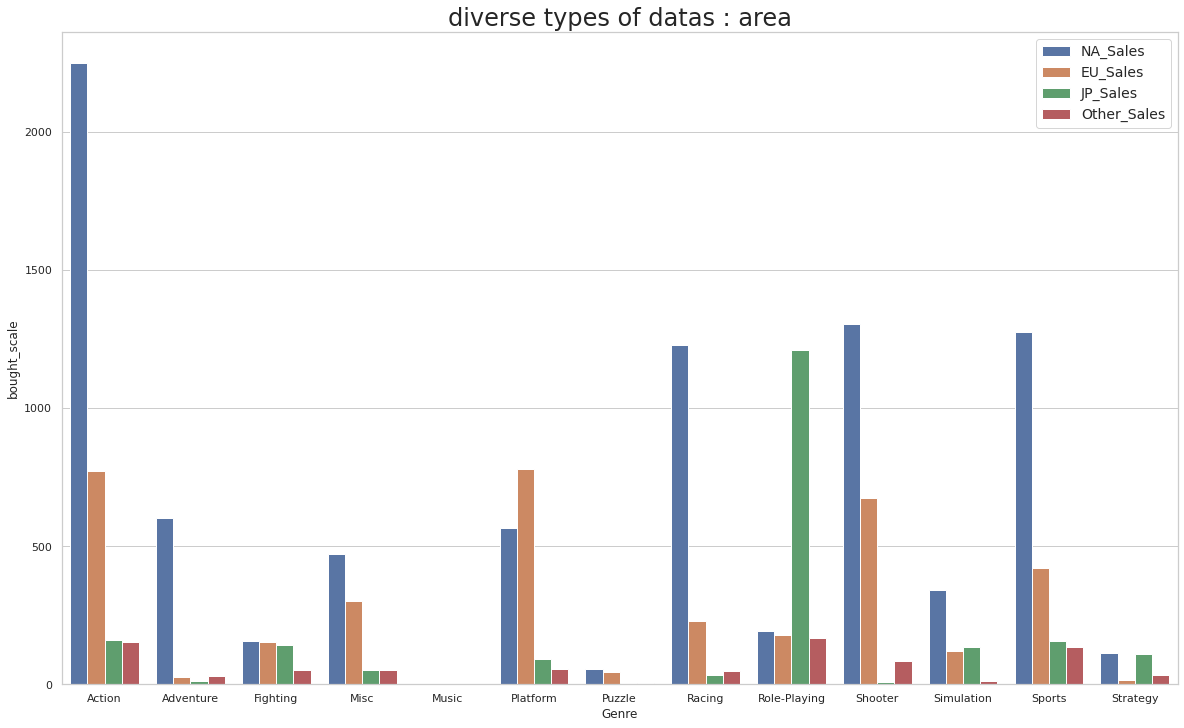

In [43]:
#시각화 할꺼임.


entire_genre_figure = total_data.groupby(by=['Genre'])['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum().reset_index()  #연도 떨구기

columns = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

entire_genre_figure

entire_genre_figure_melt_gogo = pd.melt(entire_genre_figure, id_vars=['Genre'], value_vars=columns[0:],
                      var_name='bought_area', value_name='bought_scale')


entire_genre_figure_melt_gogo['bought_scale'] = entire_genre_figure_melt_gogo['bought_scale'] / 10000 #숫자커서 보기 쉽게

plt.figure(figsize=(20, 12))
sns.barplot(data=entire_genre_figure_melt_gogo, x='Genre', y='bought_scale', hue='bought_area')
plt.title('diverse types of datas : area', loc='center', fontsize=24)
plt.legend(fontsize=14)
plt.show()



#

## 6-2) [Q2]) 연도별 게임의 트렌드가 있을까?
---



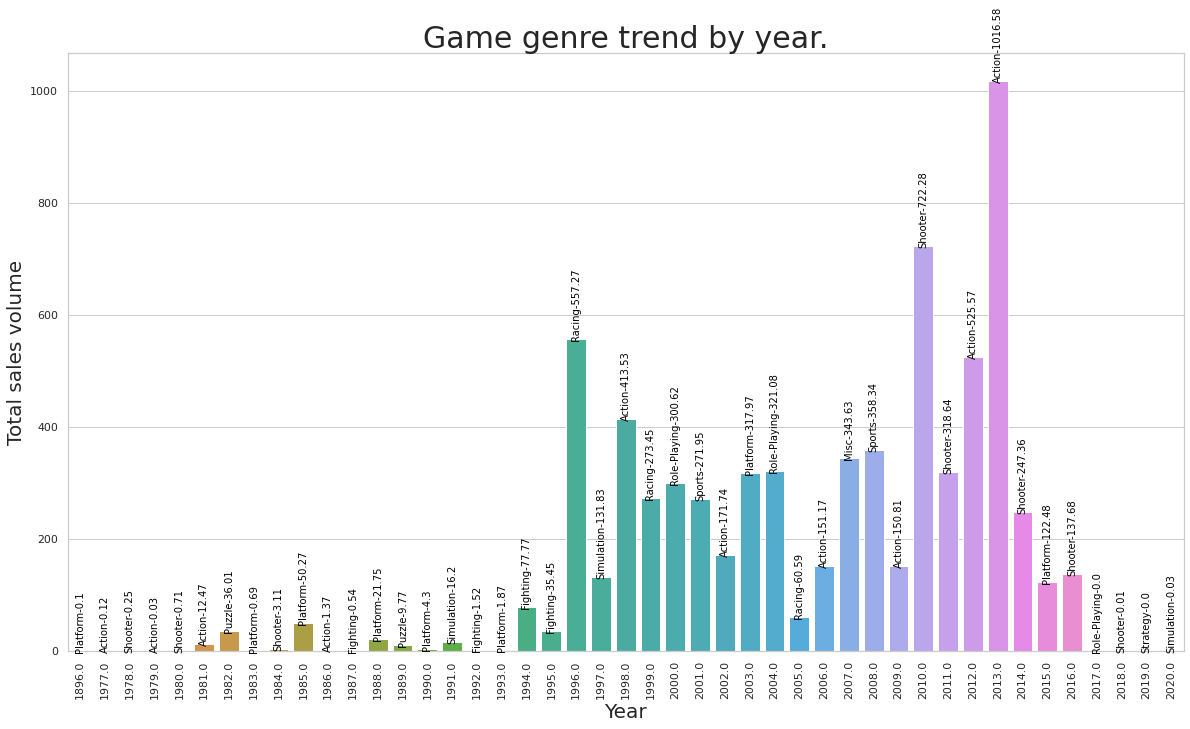

In [44]:
# 전지역 출고량에 컬럼 생성
total_data['Total_Sales'] = total_data['NA_Sales'] + total_data['EU_Sales'] + total_data['JP_Sales'] + total_data['Other_Sales']

#데이터 합치기
include_year_top_genre_data = total_data.groupby(['Year','Genre'])['Total_Sales'].sum().reset_index()  


#연도별 가장 큰놈이 누구냐!
include_year_genre_max = include_year_top_genre_data.groupby(['Year'])['Total_Sales'].transform(max) == include_year_top_genre_data['Total_Sales']  #.transform() 그 변환된 값을 데이터프레임에 자체 생성하도록 해주는거
include_year_genre_max   # 큰거 True 반환

#연도 큰놈만 남기고 나머지 버렷!
include_year_genre =include_year_top_genre_data[include_year_genre_max].reset_index(drop = True)
include_year_genre['Total_Sales'] = include_year_genre['Total_Sales'] /10000  # 수가 너무 커서 그냥 보기쉽게





genre = include_year_genre['Genre'].values

#바 차트 그릴꺼다

sns.set_context('notebook')                                                           #기본으로
sns.set_style('whitegrid')                                                            #배경에 실선 나옴

plt.figure(figsize=(20, 11))
g = sns.barplot(x='Year', y='Total_Sales',data=include_year_genre)        #  orient='h' 세로표현하고 싶다면
index = 0
for value in include_year_genre['Total_Sales']:
  g.text(index, value + 1, str(genre[index] + '-' +str(round(value, 2))), color='#000', size=10, rotation= 90, ha="center")
  index += 1

plt.title('Game genre trend by year.', fontsize=30)
plt.xlabel("Year", fontsize=20)
plt.ylabel('Total sales volume', fontsize=20)

plt.xticks(rotation=90)
plt.show()





In [45]:

#그래프가 보기 어려워서  하나 가져왔다

include_year_genre = include_year_genre.sort_values(by=['Total_Sales'], ascending=False)  #.sort_values  by로 지정된 컬럼에 따라 값을 정렬한다. asceeending= True 때리면 작은 값만 쫠ㄹㄹㄹㄹ나옴 (오름차순)
include_year_genre.reset_index(drop=True)



,Year,Genre,Total_Sales
0,2013.0,Action,1016.579
1,2010.0,Shooter,722.280
2,1996.0,Racing,557.272
3,2012.0,Action,525.571
4,1998.0,Action,413.531
5,2008.0,Sports,358.339
6,2007.0,Misc,343.631
7,2004.0,Role-Playing,321.082
8,2011.0,Shooter,318.638
9,2003.0,Platform,317.968


## 6-2) [Q2]) 연도별 게임가장 많이 이용하는 플랫폼?
---


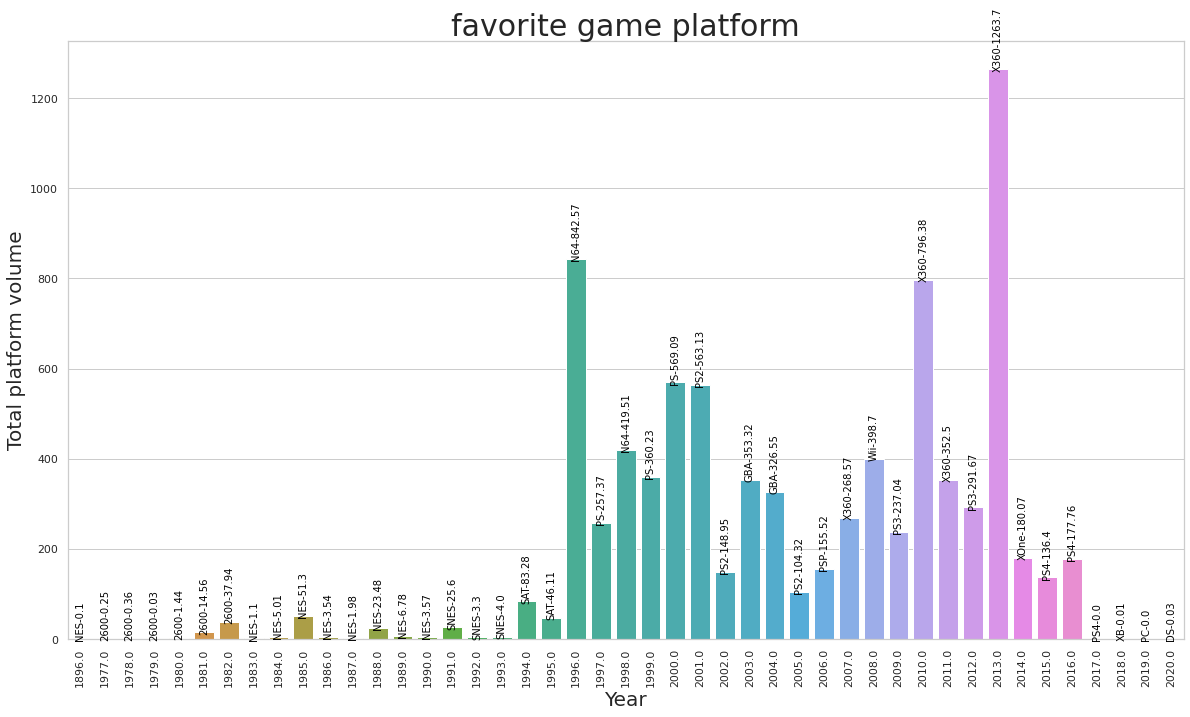

In [46]:
# 전지역 출고량에 컬럼 생성
total_data['Total_Sales'] = total_data['NA_Sales'] + total_data['EU_Sales'] + total_data['JP_Sales'] + total_data['Other_Sales']

#데이터 합치기
platform_data = total_data.groupby(['Year','Platform'])['Total_Sales'].sum().reset_index()  



#연도별 가장 큰놈이 누구냐!
platform_top = platform_data.groupby(['Year'])['Total_Sales'].transform(max) == platform_data['Total_Sales']  #.transform() 그 변환된 값을 데이터프레임에 자체 생성하도록 해주는거
platform_top   # 큰거 True 반환




#연도 큰놈만 남기고 나머지 버렷!
include_year_platform =platform_data[platform_top].reset_index(drop = True)
include_year_platform['Total_Sales'] = include_year_platform['Total_Sales'] /10000  # 수가 너무 커서 그냥 보기쉽게


include_year_platform.sort_values(by=['Total_Sales'], ascending=False).reset_index(drop = True)  #표뽑을라고





platform_part = include_year_platform['Platform'].values

#바 차트 그릴꺼다

sns.set_context('notebook')                                                           #기본으로
sns.set_style('whitegrid')                                                            #배경에 실선 나옴

plt.figure(figsize=(20, 11))
g = sns.barplot(x='Year', y='Total_Sales',data=include_year_platform)        #  orient='h' 세로표현하고 싶다면
index = 0
for value in include_year_platform['Total_Sales']:
  g.text(index, value + 1, str(platform_part[index] + '-' +str(round(value, 2))), color='#000', size=10, rotation= 90, ha="center")
  index += 1

plt.title('favorite game platform', fontsize=30)
plt.xlabel("Year", fontsize=20)
plt.ylabel('Total platform volume', fontsize=20)

plt.xticks(rotation=90)
plt.show()








##6-3) [Q3] 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

Text(0.5, 1.0, 'Top 10!')

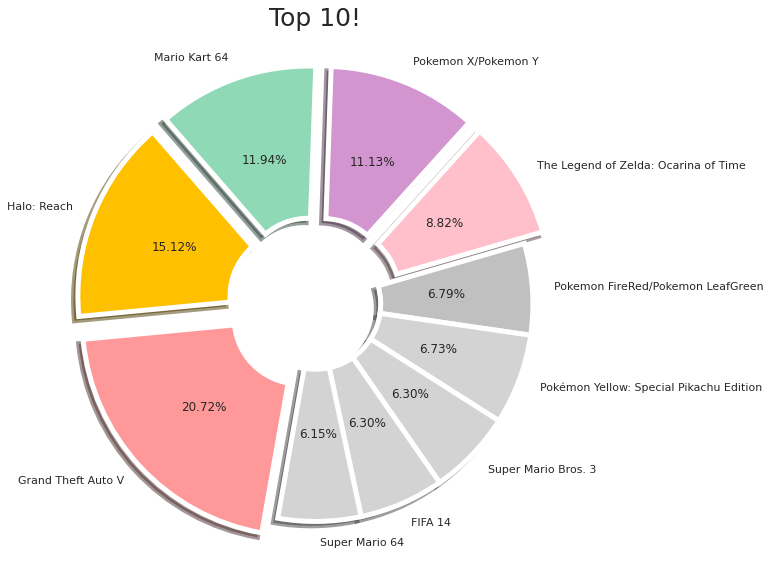

In [47]:
sort_data = total_data.sort_values(by=['Total_Sales'], ascending=False)  #.sort_values  by로 지정된 컬럼에 따라 값을 정렬한다. asceeending= True 때리면 작은 값만 쫠ㄹㄹㄹㄹ나옴 (오름차순)
top_10_game_sales = sort_data.head(10)                                      #10개만 볼래 너무많앙 ㅎㅅㅎ


#←matplotlib.pylab의 rcParams 설정을 활용하면, 차트의 크기와 선의 색, 두께등의 기본 값을 설정

#파이차트 
plt.rcParams['figure.figsize'] = [14,10]                    #←matplotlib.pylab의 rcParams 설정을 활용하면, 차트의 크기와 선의 색, 두께등의 기본 값을 설정
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','pink', 'silver','lightgray','lightgray','lightgray','lightgray']
plt.pie(top_10_game_sales['Total_Sales'], labels = top_10_game_sales['Name'],autopct='%.2f%%'
, startangle=260, counterclock=False, explode = [0.1,0.1,0.1,0.1,0.1,0,0,0,0,0]
, shadow=True, colors = colors, wedgeprops=wedgeprops);
plt.title('Top 10!' , fontsize=25)

##[별첨]파이차트 기본 값 설정 정리.
---


###잡기술 -기본(1)



```
import matplotlib.pyplot as plt

ratio = [34, 32, 16, 18]                            #각 영역 비율을 리스트로
labels = ['Apple', 'Banana', 'Melon', 'Grapes']     #라벨이름 지정해주기 

plt.pie(ratio, labels=labels, autopct='%.1f%%')    #pie()함수에 순서대로 입력  #autopct= 부채꼴안에 표시될 숫자 형식을 지정한다. ↑위에서 %까지 쓸라고 %%쓴거고 난 두자리 출력 하려고0.2f ㅇㅋㅂㄹ?
plt.show()
```

###잡기술 -기본(2)
```
%matplotlib inline
import matplotlib.pylab as plt  #선언 때리기.

plt.rcParams["figure.figsize"] = (14,4)   # 그림의 크기 | (가로, 세로의 단위)   
plt.rcParams['lines.linewidth'] = 2       #선의 두께 
plt.rcParams['lines.color'] = 'r'         #선의 색깔
plt.rcParams['axes.grid'] = True          #차트내 격자선(grid)표시 여부
```


###중급 잡기술 (1)

https://matplotlib.org/stable/gallery/color/named_colors.html #← 컬러색깔 찾아라
http://instaar.colorado.edu/~jenkinsc/carboClinic/_carboCELL/Docs/colors.py.htm # ←미리보기 없누?

```
import matplotlib.pyplot as plt

ratio = [34, 32, 16, 18]
labels = ['Apple', 'Banana', 'Melon', 'Grapes']
explode = [0, 0.10, 0, 0.10]               # explode가 부채꼴이 파이 차트에 중심에 벗어나는 정도를 말함

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode)
plt.show()


★★pie() : 괄호안에 들어가는거
#startangle=   | 부채꼴이 그려지는 각도 *디폴트는 0임
#shadow =True  |True로 설정때리면  파이차트에 그림자 뽫


```
###중급 잡기술 (2)



```
import matplotlib.pyplot as plt

ratio = [34, 32, 16, 18]
labels = ['Apple', 'Banana', 'Melon', 'Grapes']
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

★★pie() : 괄호안에 들어가는거
#wedgeprops=   |부채꼴 영역의 스타일 정하는거 위에서 딕셔너리 형태로 키 이용해서 테두리 색상이랑 선너비 박는거

```





## 6) Action (TOP 10)

---
###  Grand Theft Auto V (플랫폼 상관없이)

In [48]:
Action_data = total_data[total_data['Genre'].isin(['Action'])].reset_index(drop=True) #장르에서 액션 데이터만 뽑아올꺼다 
Action_data


Action_data_device =Action_data.groupby(['Name','Platform'])['Total_Sales'].sum().reset_index() #보기 좋게 정리하려다
Action_data_device_sort = Action_data_device.sort_values(by=['Total_Sales'], ascending=False)   # 생각이 바뀜, 플랫폼에 상관없이 탑텐이 보고싶다 하앍하앍 #.sort_values  by로 지정된 컬럼에 따라 값을 정렬한다. asceending= True 때리면 작은 값만 쫠ㄹㄹㄹㄹ나옴 (오름차순)
Action_data_device_sort.head(10)


#


,Name,Platform,Total_Sales
1030,Grand Theft Auto V,X360,9636750.0
2836,The Legend of Zelda: Ocarina of Time,N64,4103500.0
126,Assassin's Creed III,PS3,2563940.0
2564,Star Wars The Clone Wars: Lightsaber Duels,Wii,1230440.0
1103,Harry Potter and the Chamber of Secrets,GBA,1210780.0
1493,LEGO Star Wars II: The Original Trilogy,DS,960120.0
3184,WWE '13,X360,720560.0
1145,Harry Potter and the Sorcerer's Stone,GBA,661030.0
1452,LEGO Indiana Jones: The Original Adventures,DS,611630.0
1652,Medal of Honor: Warfighter,X360,580580.0


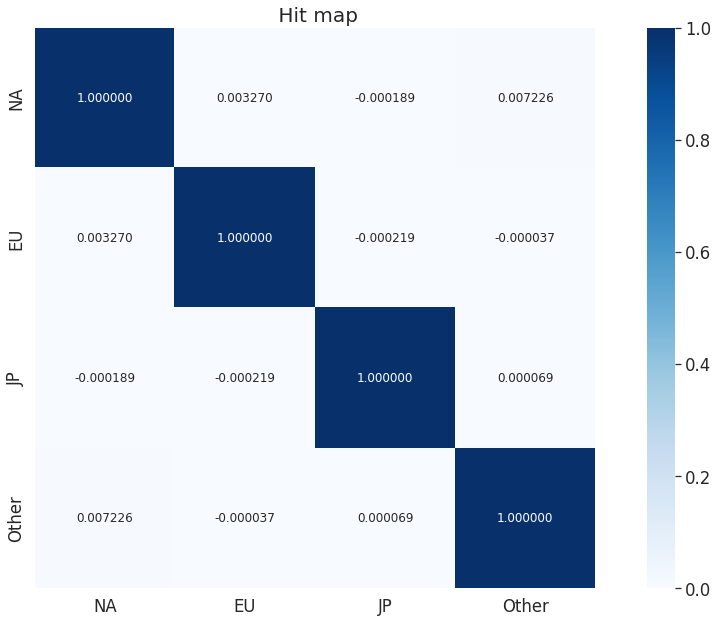

In [49]:
cols = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
corr = total_data[cols].corr(method = 'pearson')
corr #상관계수 

#1-1) 'NA_Sales' 와 'EU_Sales' 의 상관관계
#     0.003270이다. 0에 근접하므로 큰 상관성은 없다.

#1-2) 'NA_Sales' 와 'JP_Sales'의 상관관계
#    -0.000189이다. '부'의 상관관계가 있지만 0에 근접하므로 큰 상관성은 없다.

#1-3) 'NA_Sales'와 'Other_Sales'의 상관관계
#     0.007226이다. 0에 근접하므로 큰 상관성은 없다.

#--------------------------------------------------

#2-1) 'EU_Sales' 와 'JP_Sales'의 상관관계
#    -0.000219이다. '부'의 상관관계가 있지만 0에 근접하므로 큰 상관성은 없다.

#2-2) 'EU_Sales' 와 'Other_Sales'의 상관관계
#    -0.000037이다. '부'의 상관관계가 있지만 0에 근접하기에 큰 상관성은 없다

#2-3) 'JP_Sales' 와 'Other_Sales'의 상관관계
#     0.000069이다. 0에 근접하기에 큰 상관성은 없다.



#행렬 히트맵 시각화

cols_view = ['NA','EU','JP','Other'] 
sns.set(rc = {'figure.figsize':(15,9)})

sns.set(font_scale= 1.5)   #히트맵사이즈 만지작
hm = sns.heatmap(corr.values,
               cbar =True,  
               cmap = 'Blues',            
               annot = True,              
               square = True,             
               fmt ='0.6f',                
               annot_kws = {'size':12},
               yticklabels = cols_view,   
               xticklabels = cols_view)   

plt.title(' Hit map',fontsize = 20)  #제목 넣기 
plt.tight_layout()
plt.show()


#시각화 라이브러리를 이용한 피처간의 산점도 그래프




```
cols_view = ['NA','EU','JP','Other'] # 그래프 출력을 위한 cols의 이름 축약화
sns.set(font_scale= 1.5)
hm sns.heatmap(corr.values,               #상관계수 값을 파라미터로 넣어줄꺼다
               cbar =True,                #cbar = 컬러바 그릴꺼임? ㅇㅇ
               cmap = 'Blues'             #cmap = 히트맵 색상 넣기 '냉철한 느낌의 블루 ㅇㅈ?'
               annot = True,              #True이면 각 셀에 데이터 값을 씁니다, 모양이 같은 배열인 경우 이를 data사용하여 데이터 대신 히트맵에 주석을 답니다. DataFrames는 인덱스가 아닌 위치에서 일치합니다.
               square = True,             # square = True 라면 각 셀이 정사각형 모양이 되도록 스케일링의 종횡비를 동일하게 스케일링 해준다는 느낌...인데 잘 안와닿는다..
               fmt ='0.6f'                # 주석을 추가할 때  문자열 형식 지정코드
               annot_kws = {'size' = 15}, #  True 일 때  matplotlib.axes.Axes.text()때의 키워드 인수입니다..?
               yticklabels = cols_view,   #True이면 데이터 프레임의 열 이름을 플로팅합니다. False이면 열 이름을 표시하지 마십시오. 
               xticklabels = cols_view)   #목록과 같은 경우 이러한 대체 레이블을 xticklabels로 플로팅합니다.
plt.tight_layout()
plt.show()
```



###[붙임6. 설명] 

* df['컬럼명'].value_counts()[:10]  
---
```

(1)
 [in 1]>>> index = pd.Index([3, 1, 2, 3, 4, np.nan])
ㅍ
            ↓  *( 인덱스라는 변수명에 6개의 값을 가진 'Series' 생성 
                  이 부분은 당연하게 DataFrame의 한 column으로 구성될 수 있다.)

[out 1]>>> Float64Index([3.0, 1.0, 2.0, 3.0, 4.0, nan], dtype='float64')


(2)
 [in 2]>>> index.value_counts() 

            ↓  *(데이터 프레임의 고유한 값의 개수를 포함한 series를 반환한다.)   

[out 2]>>> 3.0    2  * (3은 두 개 였으니 두 개 나옴.)
           1.0    1  * (1은 한 개 였으니 한 개 나옴.)
           2.0    1  * (2은 한 개 였으니 한 개 나옴.)
           4.0    1  * (4은 한 개 였으니 한 개 나옴.)
          dtype: int64

```
### [붙임6-1. 설명] 
* for idx,(val,cnt) in enumerate(name_count.iteritems(),1):  


---
```
[in 2]>>> for idx,(val,cnt) in enumerate(name_count.iteritems(),1) :
            print('Top',idx, ':',val,cnt)
            
[설명]  <1> .eumerate ? for문에서 iterate 할 때 순서(번호)를 같이 얻고 싶을 때
         사용합니다.
         
        <1-1> 이 함수는 순서가 있는 자료형(list, set, tuple, dictionary, 
         string)을 0부터 입력으로 받아 인덱스 값을 포함하는 enumerate 객체를
         리턴합니다.    
            
        <1-2> 보통 enumerate 함수는 for문과 함께 자주 사용됩니다.

        Ex_01)

[Ex_in_01]   dict1 = {'이름': '한사람', '나이': 33}
             data = enumerate(dict1)
             for i, key in data:
              print(i, ":", key, dict1[key])
             print()


[Ex_out_01] 0 : 이름 한사람
            1 : 나이 33
        
        Ex_02)

[Ex_in_02]  data = enumerate("재미있는 파이썬")
            for i, value in data:
              print(i, ":", value)
            print()          

            0 : 재
            1 : 미
            2 : 있
            3 : 는
            4 :  
            5 : 파
            6 : 이
            7 : 썬
            
```

### [붙임6-2. 설명] 
* iteritems()

<1.series에서>
(인덱스(index), 값(value)) 튜플을 천천히 반복합니다.


<2.DataFrame에서>

데이터 프레임의 컬럼을 반복하여 열이름과 내용이 있는 튜플을 series로 반환한다.
이 메서드는 반복 가능한 튜플(column name, series)을 반환합니다. 

idx 인덱스 값 val(데이터 값(value))

        


[out 2]>>> Top 1 : Need for Speed: Most Wanted 12
           Top 2 : LEGO Marvel Super Heroes 9
           Top 3 : FIFA 14 9
           Top 4 : Ratatouille 9
           Top 5 : Madden NFL 07 9
           Top 6 : LEGO Harry Potter: Years 5-7 8
           Top 7 : FIFA 15 8
           Top 8 : Angry Birds Star Wars 8
           Top 9 : FIFA Soccer 13 8
           Top 10 : Lego Batman 3: Beyond Gotham 8



